# Introduction to Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified by humans. Please be cautious when interpreting the code or results and validate them independently.**

## Dataset Overview

This dataset contains electrophysiological signals simulated from a cortico-basal-ganglia network model of Parkinson's Disease. The data includes:

* Local Field Potential (LFP) signals from the Subthalamic Nucleus (STN) in the time domain
* Beta Average Rectified Voltage (ARV) derived from LFP signals

A key characteristic of Parkinsonian signals is elevated power density in the beta frequency band (13-30 Hz). These beta oscillations in the STN serve as pathological biomarkers for Parkinson's Disease symptoms.

The dataset was generated using a computational model originally presented in Fleming et al.'s work on closed-loop Deep Brain Stimulation control schemes.

## Setting Up the Environment

First, let's import the required libraries and set up our plotting environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pynwb
import lindi

# Configure matplotlib for better visualization
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

/tmp/ipykernel_1835238/379219726.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Loading the Data

We'll load the NWB file that contains the simulated healthy subject data. The file is hosted on the DANDI archive and can be accessed remotely:

In [2]:
# Load the NWB file using lindi (allows remote access)
f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001333/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/nwb.lindi.json"
)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic information about the dataset
print(f"Dataset name: {nwb.session_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Subject type: {nwb.subject.description}")
print(f"Keywords: {', '.join(nwb.keywords)}")

Dataset name: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Institution: Michigan Technological University
Lab: BrainX Lab
Subject type: This is a simulated dataset generated from a computational model.
Keywords: ecephys, LFP, Parkinson's Disease, Beta Band


## Exploring the LFP Data

The Local Field Potential (LFP) data is stored in the 'ecephys' processing module. Let's examine its properties and plot a segment:

Sampling rate: 2000.0 Hz
Recording duration: 38.70 seconds
Number of samples: 77400


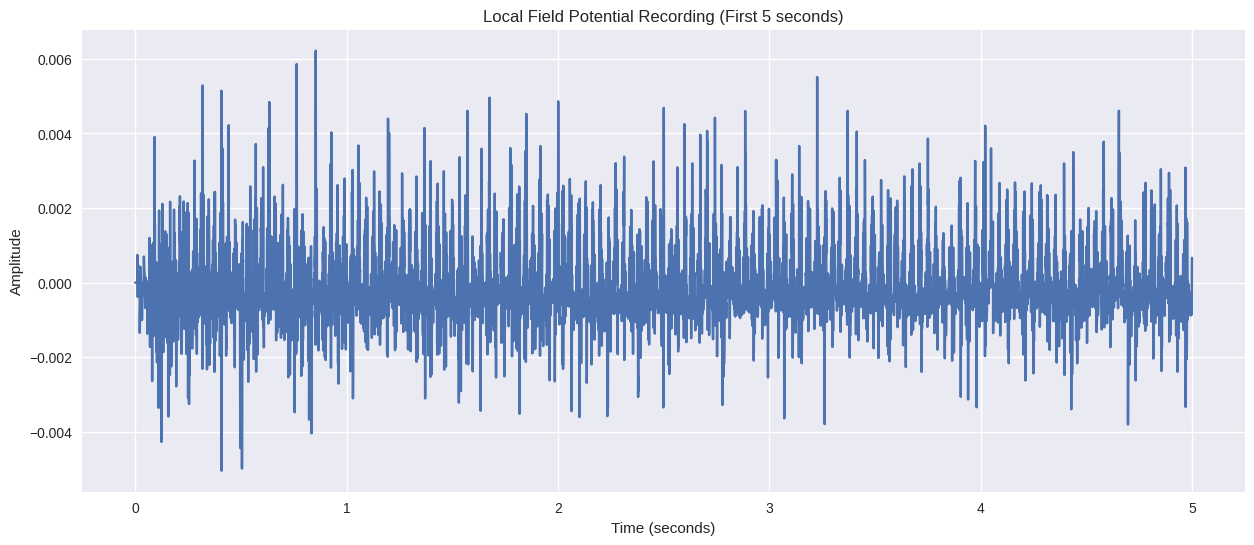

In [3]:
# Access the LFP data
lfp = nwb.processing["ecephys"]["LFP"]["LFP"]

# Get information about the recording
sampling_rate = lfp.rate  # Hz
duration = len(lfp.data) / sampling_rate  # seconds

print(f"Sampling rate: {sampling_rate} Hz")
print(f"Recording duration: {duration:.2f} seconds")
print(f"Number of samples: {len(lfp.data)}")

# Load a 5-second segment of data (Note: loading subset to avoid large data transfer)
start_time = 0  # seconds
segment_duration = 5  # seconds
n_samples = int(segment_duration * sampling_rate)
time = np.arange(n_samples) / sampling_rate
data_segment = lfp.data[0:n_samples]

# Plot the LFP time series
plt.figure(figsize=(15, 6))
plt.plot(time, data_segment)
plt.title('Local Field Potential Recording (First 5 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Spectral Analysis

Let's analyze the frequency content of the LFP signal, particularly focusing on the beta band (13-30 Hz):

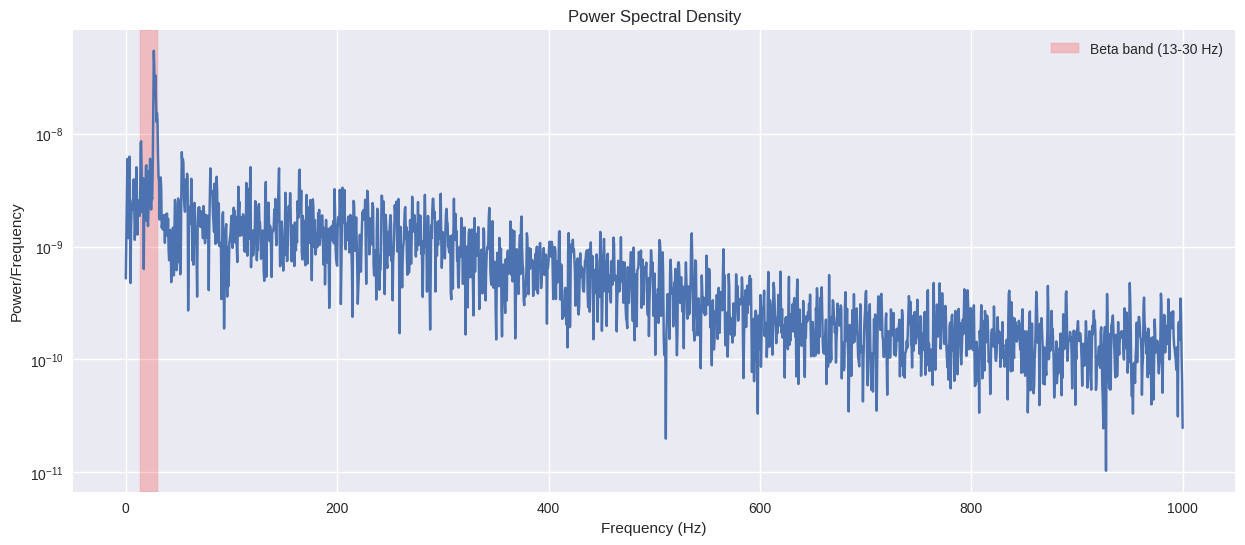

In [4]:
# Compute power spectral density using Welch's method
nperseg = int(2 * sampling_rate)  # 2-second segments
freqs, psd = signal.welch(data_segment, fs=sampling_rate, nperseg=nperseg)

# Plot the power spectrum
plt.figure(figsize=(15, 6))
plt.semilogy(freqs, psd)
plt.axvspan(13, 30, color='r', alpha=0.2, label='Beta band (13-30 Hz)')
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.grid(True)
plt.legend()
plt.show()

## Beta Band Analysis

Let's isolate and examine the beta band activity using a bandpass filter:

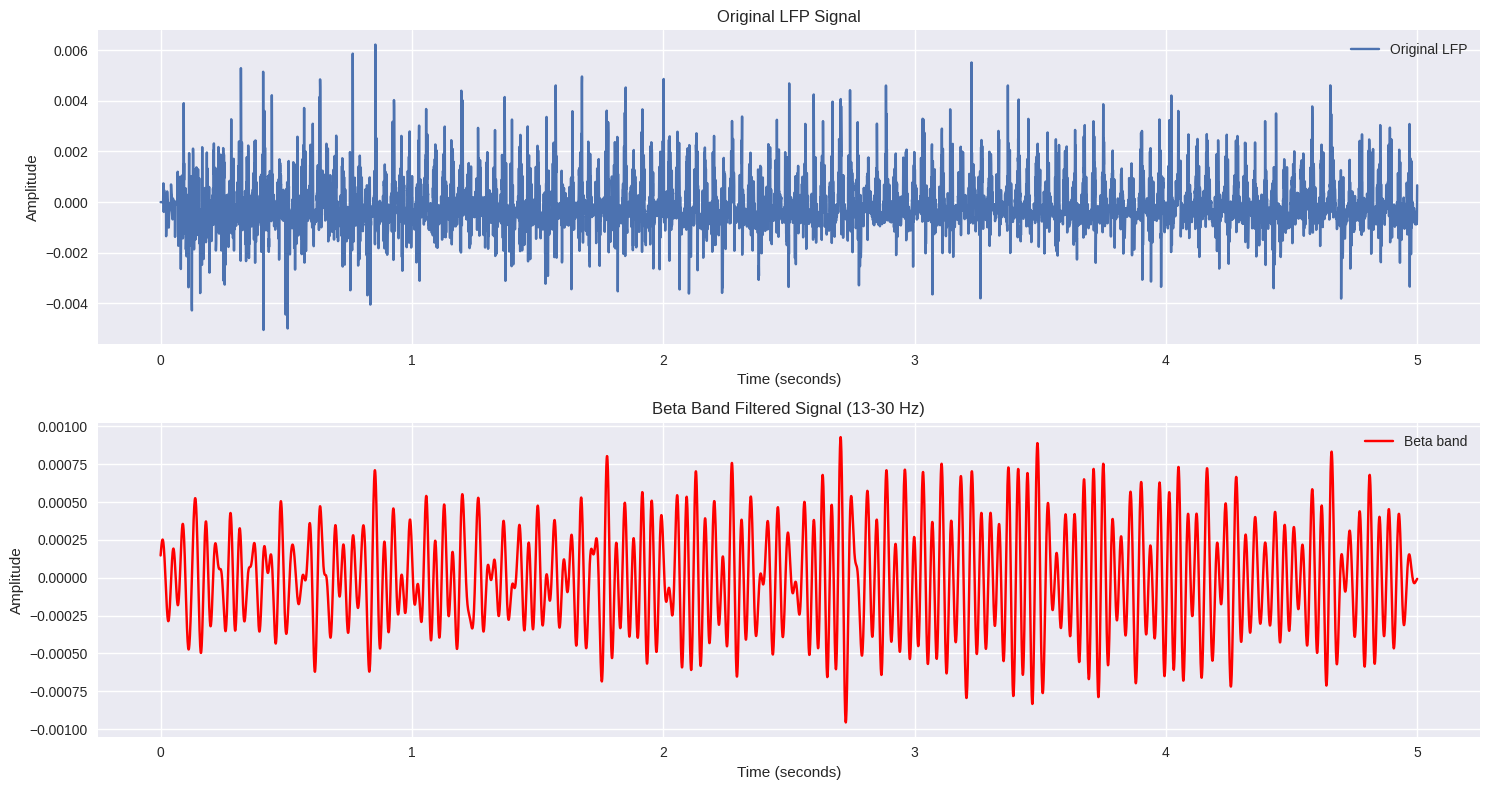

In [5]:
# Design bandpass filter for beta band (13-30 Hz)
nyquist = sampling_rate / 2
b, a = signal.butter(4, [13 / nyquist, 30 / nyquist], btype='band')

# Apply filter to the data segment
beta_filtered = signal.filtfilt(b, a, data_segment)

# Plot original signal vs beta-filtered signal
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(time, data_segment, label='Original LFP')
plt.title('Original LFP Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, beta_filtered, label='Beta band', color='r')
plt.title('Beta Band Filtered Signal (13-30 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Beta ARV (Average Rectified Value)

Let's compute the Average Rectified Value of the beta band signal, which is used as a biomarker:

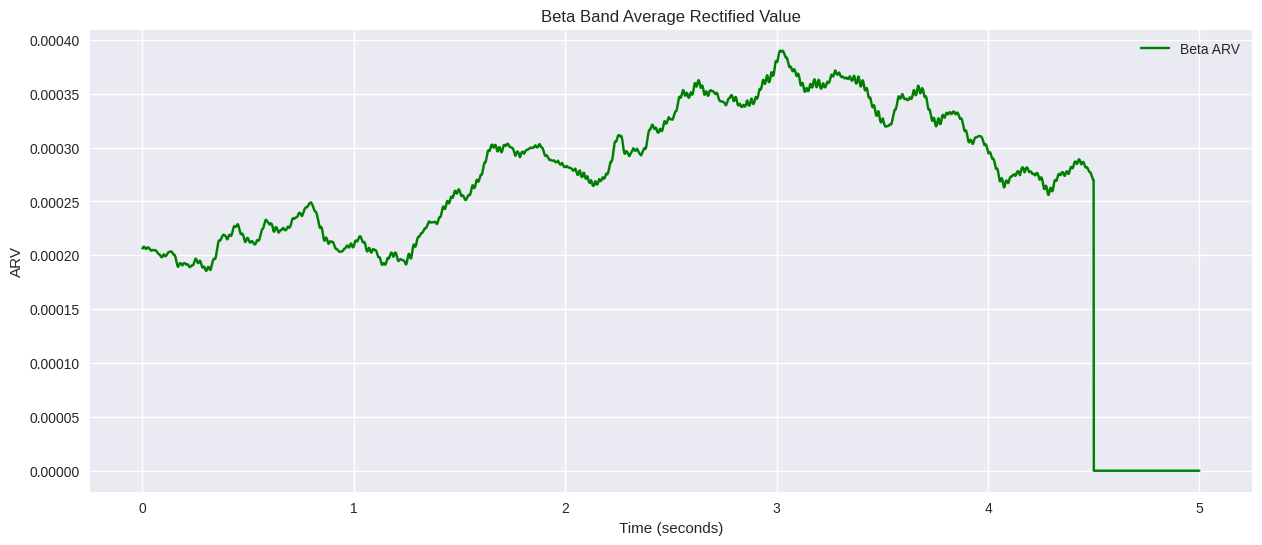

In [6]:
# Compute ARV using a sliding window
window_size = int(0.5 * sampling_rate)  # 500ms window
arv = np.zeros_like(beta_filtered)

for i in range(len(beta_filtered) - window_size):
    arv[i] = np.mean(np.abs(beta_filtered[i:i + window_size]))

# Plot the ARV
plt.figure(figsize=(15, 6))
plt.plot(time, arv, 'g', label='Beta ARV')
plt.title('Beta Band Average Rectified Value')
plt.xlabel('Time (seconds)')
plt.ylabel('ARV')
plt.grid(True)
plt.legend()
plt.show()

## Electrode Information

Let's examine the electrode configuration used in this recording:

In [7]:
# Get electrode information
electrodes = nwb.ec_electrodes
print("\nElectrode Information:")
print("-" * 50)
for i in range(len(electrodes.id)):
    print(f"Electrode {i + 1}:")
    print(f"  Location: {electrodes['location'][i]}")
    print(f"  Group: {electrodes['group_name'][i]}")
    print(f"  Label: {electrodes['label'][i]}")
    print()


Electrode Information:
--------------------------------------------------
Electrode 1:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank0
  Label: shank0_elec0

Electrode 2:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank0
  Label: shank0_elec1

Electrode 3:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank0
  Label: shank0_elec2

Electrode 4:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank1
  Label: shank1_elec0

Electrode 5:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank1
  Label: shank1_elec1

Electrode 6:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank1
  Label: shank1_elec2

Electrode 7:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank2
  Label: shank2_elec0

Electrode 8:
  Location: Simulated Cortico-basal-ganglia network of brain
  Group: shank2
  Label: shank2_elec1

Electrode 9:
  Locati

## Summary

This notebook demonstrated how to:
1. Load and access LFP data from the PESD dataset
2. Visualize the raw LFP signals
3. Perform spectral analysis to examine frequency content
4. Filter and isolate beta band activity
5. Compute the Average Rectified Value (ARV) as a biomarker
6. Access electrode configuration information

The analysis reveals clear beta band activity in the simulated data, which is characteristic of Parkinsonian neural activity. This dataset provides a valuable resource for studying Parkinson's Disease biomarkers and developing closed-loop Deep Brain Stimulation control strategies.